In [4]:
from ip_analysis_tool.util.graph_getter import get_graph_by_date
from ip_analysis_tool.util.date_util import get_date_object
from ip_analysis_tool.accessibility_within_hops import accessibility_within_hops
from json import dump
import pandas as pd

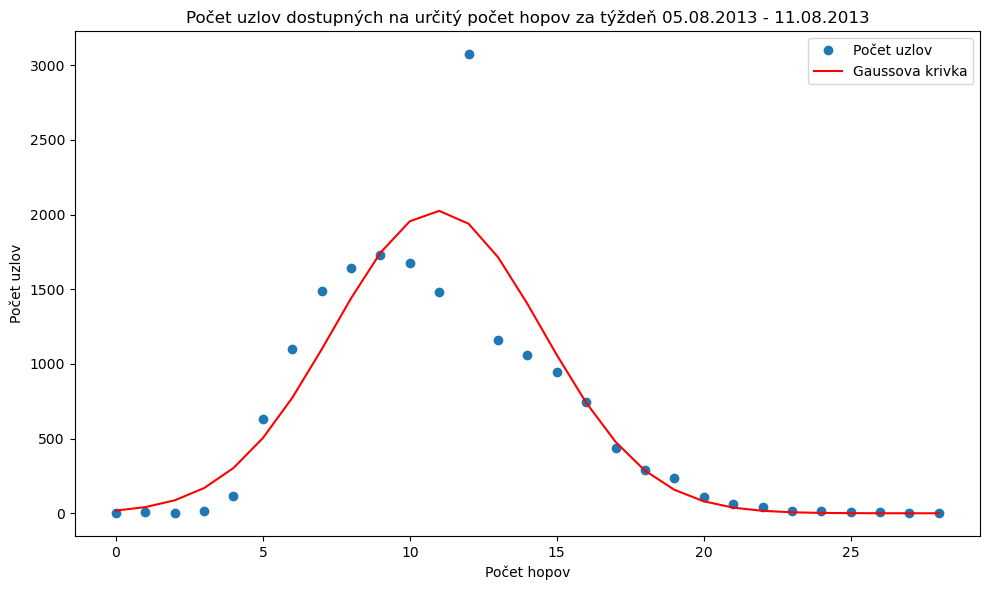

    distance  count  percentage  cumulative_count  cumulative_percentage  \
0          0      1    0.005528                 1               0.005528   
1          1      7    0.038698                 8               0.044226   
2          2      2    0.011056                10               0.055282   
3          3     14    0.077395                24               0.132677   
4          4    113    0.624689               137               0.757366   
5          5    633    3.499364               770               4.256731   
6          6   1101    6.086572              1871              10.343303   
7          7   1487    8.220465              3358              18.563768   
8          8   1640    9.066283              4998              27.630051   
9          9   1729    9.558295              6727              37.188347   
10        10   1675    9.259771              8402              46.448118   
11        11   1482    8.192824              9884              54.640942   
12        12

In [5]:
from ip_analysis_tool.trend_identification import gaussian_fit
from ip_analysis_tool.visualize.chart import visualize_chart_add_line
data = accessibility_within_hops(get_graph_by_date(get_date_object("2013-08-05")))
data = gaussian_fit(data, x_characteristic="distance", y_characteristic="count")
data.to_csv("scratchpad/accessibility_within_hops_2013-08-05.csv", index=False)
visualize_chart_add_line(
    data=data,
    x_characteristic="distance",
    y_characteristic="count",
    y_line_characteristic="gauss_fit",
    title="Počet uzlov dostupných na určitý počet hopov za týždeň 05.08.2013 - 11.08.2013",
    x_label="Počet hopov",
    y_label="Počet uzlov",
    y_line_label="Gaussova krivka",
)
print(data)

    distance  count  percentage  cumulative_count  cumulative_percentage  \
0          0      1    0.000316                 1               0.000316   
1          1     60    0.018976                61               0.019292   
2          2   1057    0.334294              1118               0.353586   
3          3    585    0.185016              1703               0.538602   
4          4   1282    0.405454              2985               0.944056   
5          5  12894    4.077941             15879               5.021996   
6          6  14251    4.507114             30130               9.529111   
7          7  19700    6.230451             49830              15.759562   
8          8  25812    8.163472             75642              23.923033   
9          9  30532    9.656250            106174              33.579283   
10        10  30336    9.594262            136510              43.173545   
11        11  29096    9.202091            165606              52.375636   
12        12

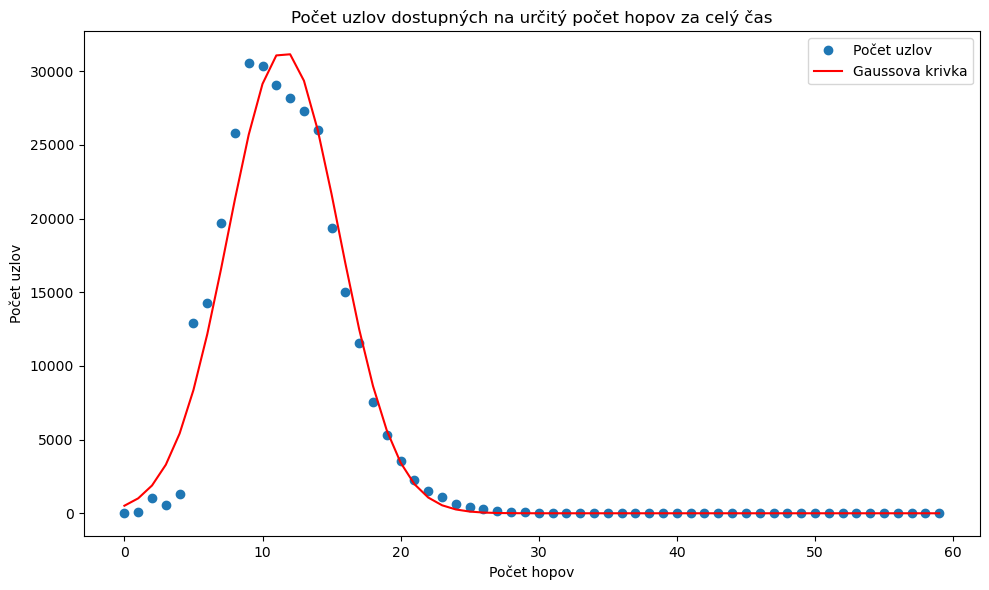

In [6]:
# Entire data range
from ip_analysis_tool.visualize.chart import visualize_chart_add_line
from ip_analysis_tool.enums import TimeInterval
from ip_analysis_tool.trend_identification import gaussian_fit
data = accessibility_within_hops(get_graph_by_date(time_interval=TimeInterval.ALL))
data = gaussian_fit(data, x_characteristic="distance", y_characteristic="count")
print(data)
data.to_csv("scratchpad/accessibility_within_hops_all.csv", index=False)
visualize_chart_add_line(
    data=data,
    x_characteristic="distance",
    y_characteristic="count",
    y_line_characteristic="gauss_fit",
    title="Počet uzlov dostupných na určitý počet hopov za celý čas",
    x_label="Počet hopov",
    y_label="Počet uzlov",
    y_line_label="Gaussova krivka",
)